<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/AIRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Traditional Regression Machine Learning


Nicholas Ernesto Anak Agung<br>
TI-2B / 4.33.23.1.19

In [76]:
import numpy as np
import pandas as pd

In [77]:
file="concrete_data.csv"
df=pd.read_csv(file)
df.head(6)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [78]:
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [79]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [80]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [81]:
import seaborn as sns

<Axes: >

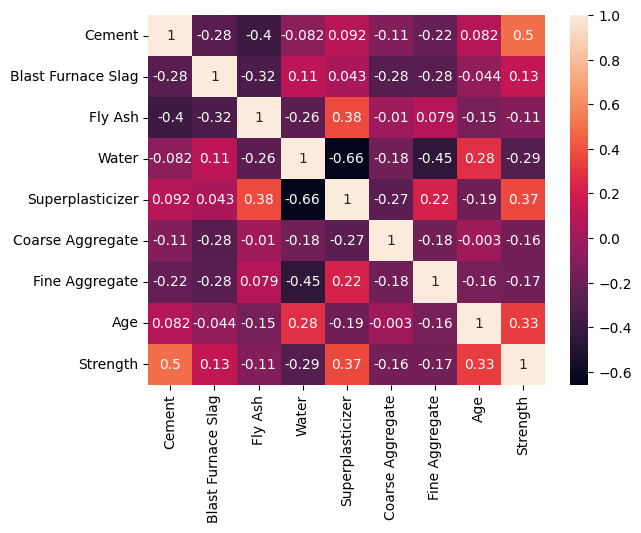

In [82]:
sns.heatmap(df.corr(), annot=True)

##Simple Linear

In [83]:
highly_correlated_x = df.corr()['Strength'].abs() > .4
highly_correlated_x = highly_correlated_x[highly_correlated_x == True].index.tolist()
highly_correlated_x.remove('Strength')
print (highly_correlated_x)

X = df[highly_correlated_x]  # Use the highly correlated features
y = df['Strength']

['Cement']


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [85]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
import matplotlib.pyplot as plt

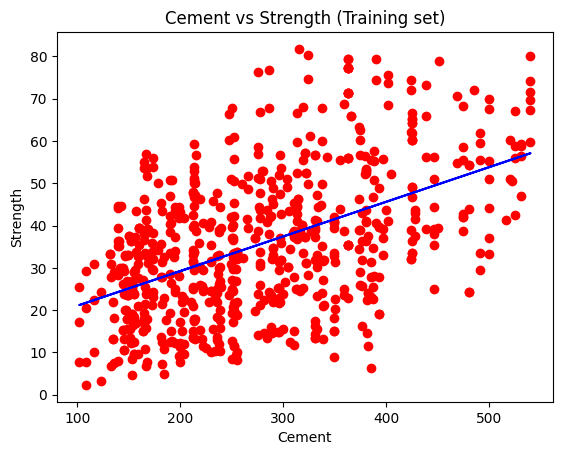

In [88]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Cement vs Strength (Training set)')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

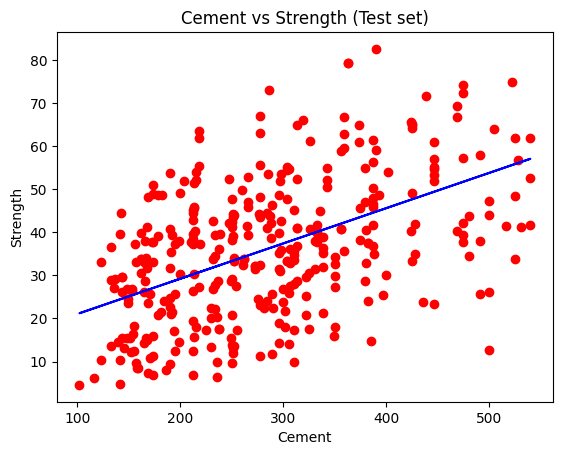

In [89]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Cement vs Strength (Test set)')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

mse_poly, r2_poly

(199.4843251371976, 0.23176429256233)

##Multiple Linear Regression

In [91]:
X = df.drop(columns=['Strength'])
y = df['Strength']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[39.16 26.06]
 [14.62 10.35]
 [61.44 79.3 ]
 [53.78 74.99]
 [24.67  9.69]
 [53.45 47.1 ]
 [46.04 59.  ]
 [27.01 22.72]
 [52.98 61.89]
 [37.77 52.12]
 [16.78 17.54]
 [39.38 48.15]
 [29.59 38.33]
 [35.96 17.2 ]
 [47.58 56.83]
 [56.53 55.25]
 [35.48 33.36]
 [29.57 34.68]
 [48.31 52.61]
 [35.1  39.94]
 [53.5  61.46]
 [32.64 27.63]
 [32.79 32.9 ]
 [47.85 41.64]
 [23.52 17.54]
 [23.5  26.85]
 [69.34 66.9 ]
 [26.46 21.06]
 [56.53 61.07]
 [48.29 66.95]
 [18.95 20.87]
 [36.73 48.79]
 [17.7  24.05]
 [19.86 47.81]
 [24.53 21.16]
 [15.47  6.94]
 [52.99 28.6 ]
 [27.88 26.31]
 [27.49 33.95]
 [26.11 25.72]
 [52.38 37.8 ]
 [30.71 35.17]
 [25.83 32.24]
 [35.35 37.81]
 [53.49 57.23]
 [53.84 33.4 ]
 [30.33 30.14]
 [43.74 33.8 ]
 [27.36 35.08]
 [58.29 52.91]
 [36.82 40.93]
 [19.22 21.75]
 [23.43 16.5 ]
 [34.66 42.35]
 [43.65 50.94]
 [47.1  64.02]
 [35.8  52.2 ]
 [52.9  53.39]
 [59.94 64.3 ]
 [36.71 44.52]
 [31.1  37.42]
 [20.48 22.14]
 [50.43 62.94]
 [55.43 45.7 ]
 [20.77 14.64]
 [44.38 53.58]
 [33.34 33

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

mse_poly, r2_poly

(95.61717380589965, 0.6369606518338298)

##Polynomial Regression

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
x = df.drop(columns=['Strength'])
y = df['Strength']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [100]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test_poly)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

mse_poly, r2_poly

(55.58245788045472, 0.7842939778601422)

In [103]:
import matplotlib.pyplot as plt

##SVR

In [104]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [105]:
X = df.drop(columns=['Strength'])
y = df['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))
X_test = sc_X.transform(X_test)


In [107]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [108]:
y_pred = regressor.predict(X_test)

In [109]:
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

In [110]:
# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")

Mean Squared Error (SVR): 41.27433360649161
R-squared (SVR): 0.8432895831149401


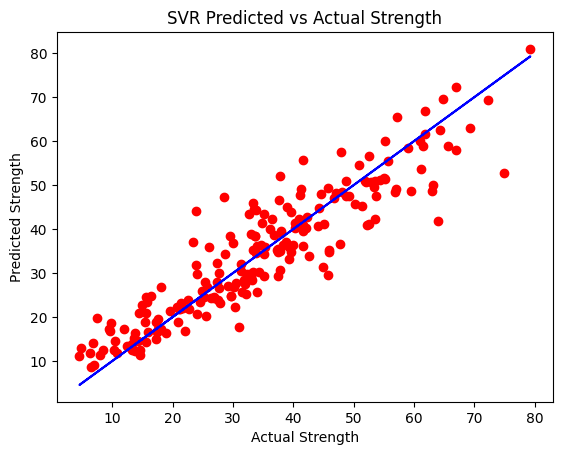

In [111]:
# prompt: visualize the svr result

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='blue') # Add a line for perfect prediction
plt.title('SVR Predicted vs Actual Strength')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.show()


##Decision Tree Regression

In [112]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [113]:
X = df.drop(columns=['Strength'])
y = df['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [115]:
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Decision Tree): {mse_dt}")
print(f"R-squared (Decision Tree): {r2_dt}")

Mean Squared Error (Decision Tree): 57.610746844660206
R-squared (Decision Tree): 0.7812634786266689


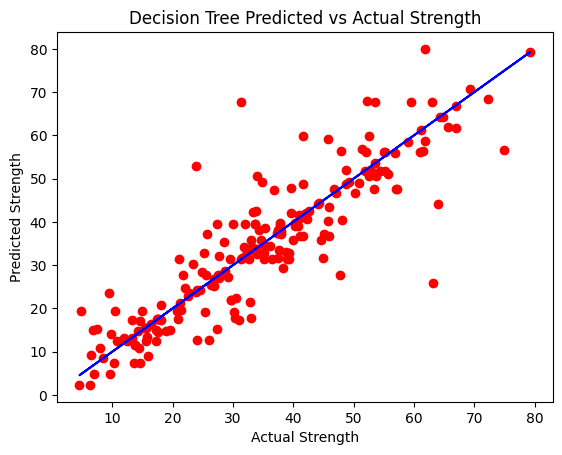

In [116]:
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='blue') # Add a line for perfect prediction
plt.title('Decision Tree Predicted vs Actual Strength')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.show()

##Random Forest

In [117]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [118]:
X = df.drop(columns=['Strength'])
y = df['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [120]:
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 23.45116223328209
R-squared (Random Forest): 0.9109606118646383


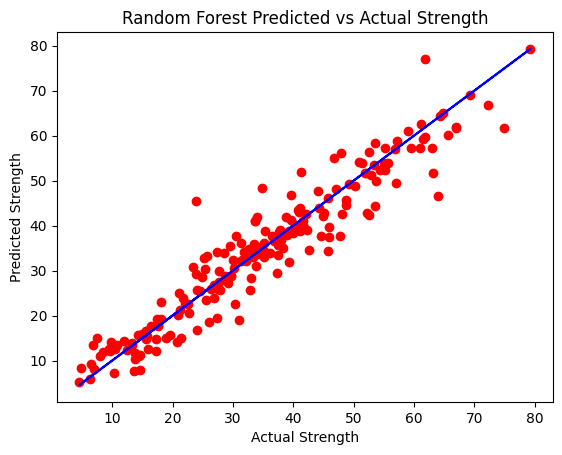

In [121]:
plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='blue') # Add a line for perfect prediction
plt.title('Random Forest Predicted vs Actual Strength')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.show()